#Reto Semana 4

Integrantes:

*   Kelly España
*   Rafael Jiménez
*   Bryan Silva
*   Estefanía Vargas
*   Steeven Cruz

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Wallmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

    
*   Tienda-el número de la tienda.
*   Fecha-la semana de ventas
*   Weekly_Sales - ventas para la tienda dada.
*   Holiday_Flag: si la semana es una semana especial de vacaciones 1 –         Semana de vacaciones 0 – Semana no festiva.
*   Temperatura - Temperatura el día de la venta.
*   Fuel_price -costo del combustible en la región.
*   IPC-índice de precios al consumidor vigente.
*   Desempleo - tasa de desempleo predominante.
*   Eventos festivos.
*   Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\
*   Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\
*   Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\
*   Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13


# 1. Importe la base de datos en Jupyter Notebook con pandas.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [85]:
df=pd.read_csv("/content/Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?

In [86]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Al observar la descripción de la base de datos, hay algunas cosas que podrían llamar la atención:

La columna "Weekly_Sales" muestra valores que van desde 209,986 hasta 3,818,686. La media semanal de ventas es de aproximadamente 1,046,965. La diferencia entre el valor mínimo y el máximo sugiere una amplia variación en las ventas semanales.

La columna "Holiday_Flag" es binaria, con valores 0 y 1. Indica si una semana en particular es una semana de vacaciones o no.

Las columnas "Temperature" y "Fuel_Price" representan datos numéricos continuos. La temperatura tiene una media de aproximadamente 60.66 y el precio del combustible tiene una media de aproximadamente 3.36.

La columna "CPI" (Índice de Precios al Consumidor) y "Unemployment" (Tasa de Desempleo) también son variables continuas. El CPI tiene una media de aproximadamente 171.58, mientras que la tasa de desempleo tiene una media de aproximadamente 7.99.


Recodificamos el nombre de las columnas a español

In [87]:
df.rename({'Store':'nro_tienda', 'Date': 'fecha', 'Weekly_Sales':'ventas', 'Holiday_Flag': 'feriado', 'Temperature':'temperatura','Fuel_Price':'precio_combustible','CPI':'ind_precio_consumidor','Unemployment':'tasa_desempleo'},  axis=1, inplace=True)
df

,nro_tienda,fecha,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [88]:
df['feriado'] = df['feriado'].astype(str)
df['nro_tienda'] = df['nro_tienda'].astype(str)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nro_tienda             6435 non-null   object 
 1   fecha                  6435 non-null   object 
 2   ventas                 6435 non-null   float64
 3   feriado                6435 non-null   object 
 4   temperatura            6435 non-null   float64
 5   precio_combustible     6435 non-null   float64
 6   ind_precio_consumidor  6435 non-null   float64
 7   tasa_desempleo         6435 non-null   float64
dtypes: float64(5), object(3)
memory usage: 402.3+ KB


In [89]:
var_cuantitativas = df.select_dtypes('number').columns
print("Variables cuantitativas:", var_cuantitativas)

var_cualitativas  =df.select_dtypes('object').columns
print("Variables cualitativas:", var_cualitativas)

Variables cuantitativas: Index(['ventas', 'temperatura', 'precio_combustible', 'ind_precio_consumidor',
       'tasa_desempleo'],
      dtype='object')
Variables cualitativas: Index(['nro_tienda', 'fecha', 'feriado'], dtype='object')


Las variables identificadas son:

**Variables numericas:** nro_tienda, ventas, feriado, temperatura, precio_combustible, ind_precio_consumidor, tasa_desempleo.

**Variables categoricas**: fecha


Se puede observar completitud de los datos (6435 registros).

La variable feriado esta dumificada.

Se puede visualizar información en grupo respecto a las tiendas (total 45 tiendas o almacenes)

# 3. Evalúe si la base contiene datos perdidos.

In [90]:
df.isna().sum()

,0
nro_tienda,0
fecha,0
ventas,0
feriado,0
temperatura,0
precio_combustible,0
ind_precio_consumidor,0
tasa_desempleo,0


En la base de datos no existen datos perdidos.

# 4. Evalúe si alguna de las variables contiene datos atípicos (outliers)

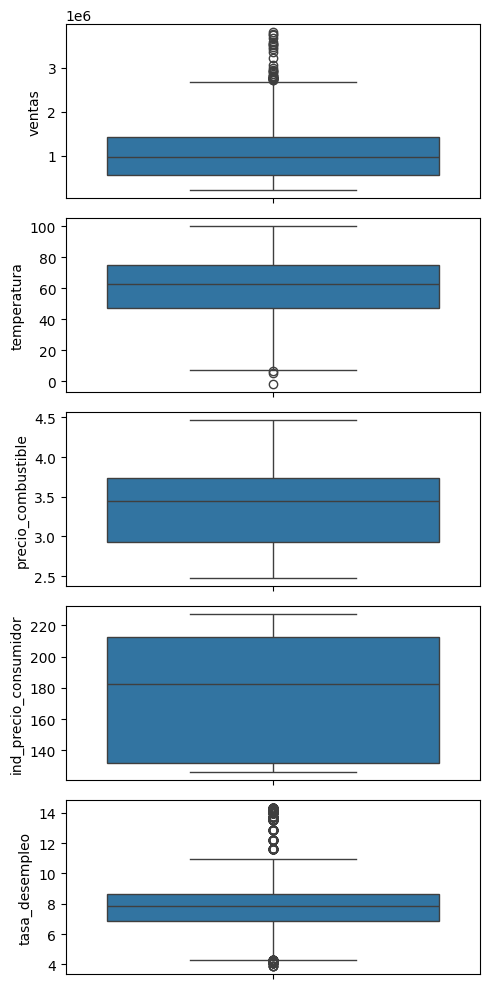

In [91]:
# Identificamos a través de la función Box plots
fig, axs = plt.subplots(5, figsize = (5,10))

plt1 = sns.boxplot(y=df['ventas'], ax = axs[0])
plt2 = sns.boxplot(y=df['temperatura'], ax = axs[1])
plt3 = sns.boxplot(y=df['precio_combustible'], ax = axs[2])
plt4 = sns.boxplot(y=df['ind_precio_consumidor'], ax = axs[3])
plt5 = sns.boxplot(y=df['tasa_desempleo'], ax = axs[4])

plt.tight_layout()

En la gráfica podemos observar datos atípicos en las variables de: ventas,temperatura, tasa de desempleo.

Para corregir estos valores atípicos, removemos las observaciones que se encuentran fuera del rango 1.5xIQR.

In [92]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['ventas'].quantile(0.25)
Q3 = df['ventas'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [93]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['ventas'] < (Q1 - 1.5 * IQR)) |(df['ventas'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

In [94]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['temperatura'].quantile(0.25)
Q3 = df['temperatura'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

27.340000000000003


In [95]:
#Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['temperatura'] < (Q1 - 1.5 * IQR)) |(df['temperatura'] > (Q3 + 1.5 * IQR)))]
df.shape

(6398, 8)

In [96]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['tasa_desempleo'].quantile(0.25)
Q3 = df['tasa_desempleo'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.7309999999999999


In [97]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['tasa_desempleo'] < (Q1 - 1.5 * IQR)) |(df['tasa_desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

(5917, 8)

In [98]:
# Para el uso de regresion lineal
dfr = df

In [99]:
#Revisamos los valores actualizadas de las variables
df.describe()

,ventas,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
count,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000
mean,1.039313e+06,60.433407,3.340543,175.023148,7.722305
std,5.519450e+05,18.386455,0.458200,39.023139,1.243337
min,2.099862e+05,7.460000,2.472000,126.064000,4.308000
25%,5.525292e+05,46.980000,2.891000,132.767067,6.891000
50%,9.472292e+05,62.620000,3.420000,190.006988,7.852000
75%,1.427624e+06,74.730000,3.721000,213.799099,8.494000
max,2.685352e+06,100.140000,4.468000,227.232807,10.926000


Se observa que el estudio esta realizado sobre 45 tiendas (max nro_tienda= 45 almacenes)

También se observa que las ventas (semanales) tienen una media de alrededor 1039313 unidades, desviación estándar de aproximadamente 551945 unidades.

La tasa de desempleo va de un valor mínimo de 4.308000 a un valor máximo considerable 10.926.

El indice de precio al consumidor va de un valor mínimo de 126.064 a un valor máximo considerable 227.23.

El precio del combustible tiene valores promedio de 3.34 unidades.

Existen cambios de temperatura que va de 7.46 grados a 100.14 grados.

# 5. Grafique las distribuciones de las vsriables y a priori comente sobre ellas.

In [100]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas = df.select_dtypes('object').columns

In [101]:
df.groupby('fecha').count()

,nro_tienda,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
fecha,,,,,,,
01-04-2011,42,42,42,42,42,42,42
01-06-2012,40,40,40,40,40,40,40
01-07-2011,42,42,42,42,42,42,42
01-10-2010,42,42,42,42,42,42,42
02-03-2012,40,40,40,40,40,40,40
...,...,...,...,...,...,...,...
30-07-2010,42,42,42,42,42,42,42
30-09-2011,42,42,42,42,42,42,42
30-12-2011,42,42,42,42,42,42,42


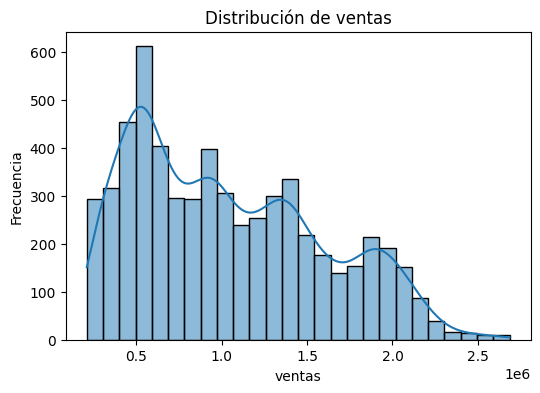

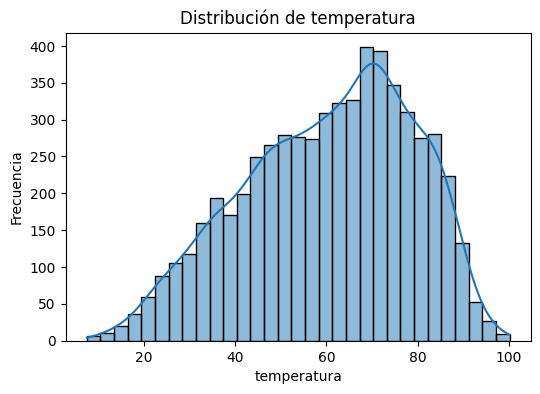

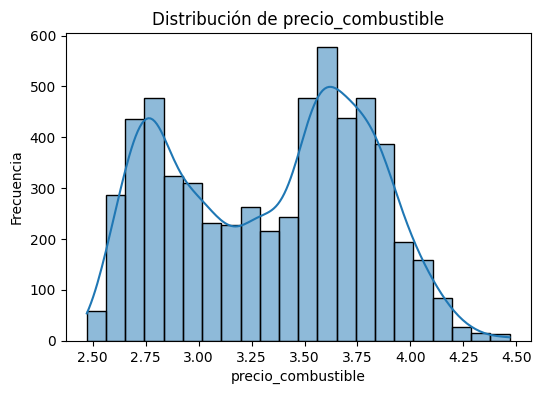

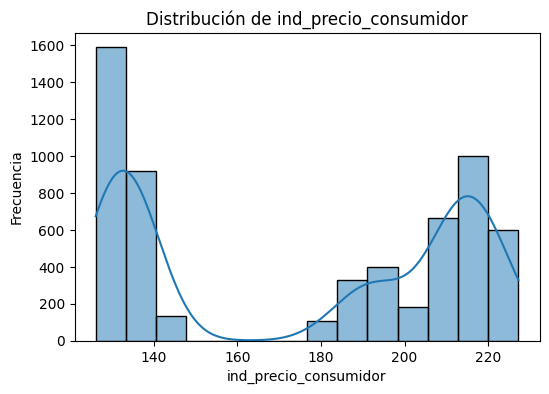

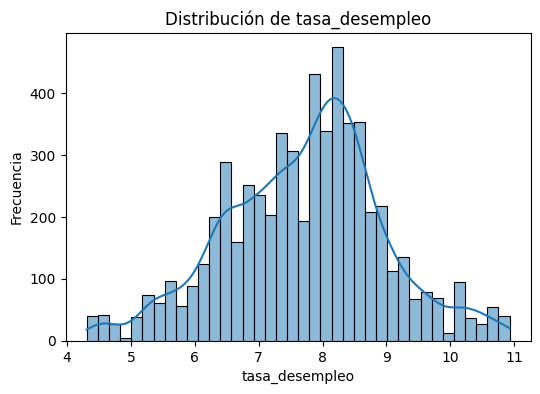

In [102]:
columnas_num = ['ventas', 'temperatura', 'precio_combustible', 'ind_precio_consumidor', 'tasa_desempleo']

# Graficar histogramas y gráficos de densidad para cada variable

for col in columnas_num:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=col, kde=True)
        plt.title('Distribución de {}'.format(col))
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

**Analisis**
- La distrbucion de la variables ventas esta sesgada hacia la derecha
- Por otro lado las varaibles de temperatura y desempleo tienden a una distribucion normal
- El IPC (Indice de Precios al Consumidor) y precio de combustible tienen una distribucion bimodal es decir tiene dos grupos de datos con frecuencias similares, posee dos modas

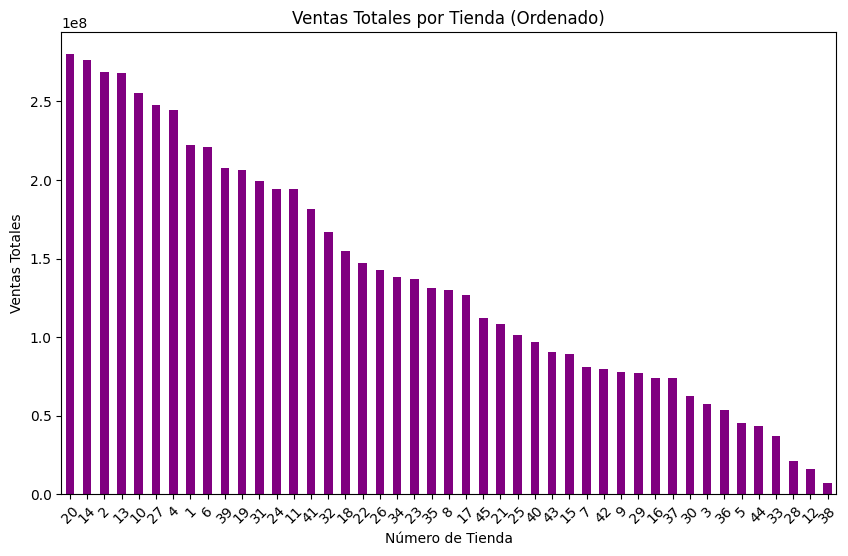

In [103]:
# Analisis de variables categorica

# Agrupar los datos por número de tienda y calcular la suma de las ventas
ventas_por_tienda = df.groupby('nro_tienda')['ventas'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_tienda.plot(kind='bar',color='purple')
plt.title('Ventas Totales por Tienda (Ordenado)')
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()


En el grafico se muestra que la tienda con le mayor ventas es la 20 asi de forma descendente hasta llegar a la numero 30 con menos ventas

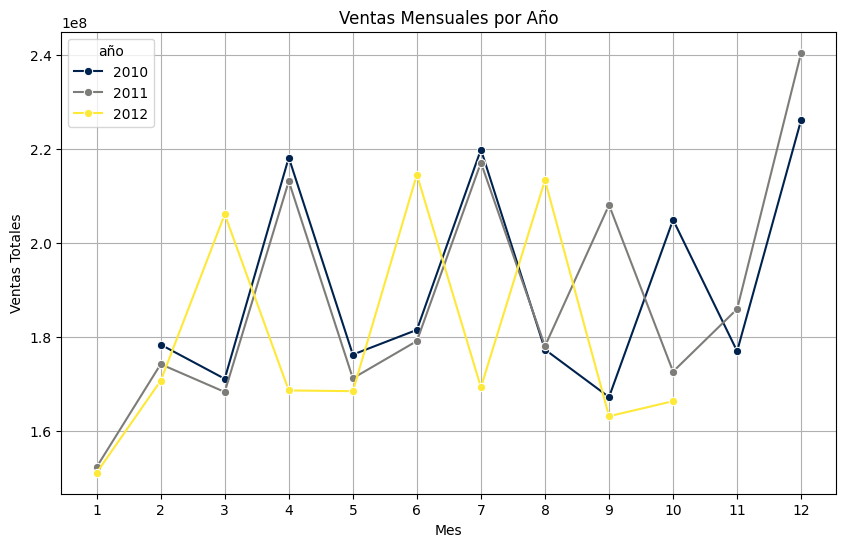

In [104]:
# Convertir la columna 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y') # Changed the format string to match day-month-year format

# Extraer mes y año
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

# Agrupar por mes y año, y calcular la suma de ventas
ventas_mensuales = df.groupby(['año', 'mes'])['ventas'].sum().reset_index()
# Crear el gráfico de líneas suavizadas con puntos
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='ventas', hue='año', marker='o', palette='cividis')
plt.title('Ventas Mensuales por Año')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(range(1, 13))  # Mostrar todos los meses
plt.grid(True)
plt.show()


Esta gráfica muestra el comportamiento mensual de las ventas a lo largo de los años. Se observa como el comportamiento de las ventas en los años 2010 y 2011 tienen un comportamiento similar, pero en el 2012 las tendencias de ventas cambian obteniendo picos en los meses que años anteriores no tuvieron un mayor volumen en ventas

# 6. Obtenga las correlaciones entre los datos de corte numérico.

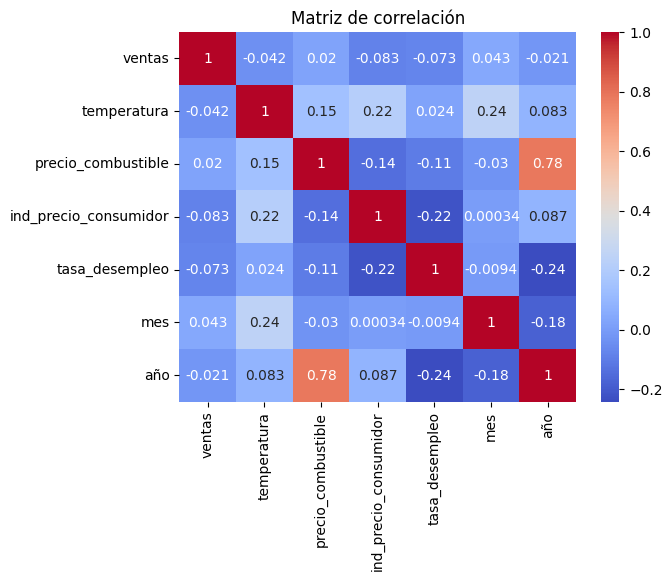

In [105]:
var_cuantitativas = df.select_dtypes(include='number')
correlaciones = var_cuantitativas.corr()

sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

**Analisis mapa de calor**
Relación entre el año y la tasa de desempleo: La relación negativa de -0.25 indica que la tasa de desempleo tiende a disminuir anualmente.

Relación entre el año y el precio del combustible: La relación positiva de 0.79 sugiere que el precio del combustible tiende a incrementarse con el tiempo

# 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.


Para el modelo, se escogerán las ventas como variable dependiente, ya que esta es la variable principal de interés y muestra una relación directa con las demás variables. Las variables independientes que se introducirán en el modelo son:

- Feriados: Para capturar el impacto de los días festivos en las ventas.
- Temperatura: Para observar cómo las condiciones climáticas afectan las ventas.
- Precio del combustible: Para analizar la relación entre el costo del combustible y las ventas.
- IPC (Índice de Precios al Consumidor): Para entender cómo los cambios en los precios generales afectan las ventas.
- Desempleo: Para evaluar el impacto de la tasa de desempleo en las ventas.
- Fecha: Para considerar el efecto de las variaciones estacionales y temporales en las ventas.

Estas variables independientes permitirán un análisis más completo del comportamiento del mercado y facilitarán la predicción de las ventas en función de estos factores.

# 8. Indique que tipo de modelación realizarán y porqué.


En base a los datos analizados se realizada un modelo de regresion lineal multiple ya que es adecuado debido a que:
- Permitira examinar como multiples variables pueden afectar a la variable dependiente y entender la recaion entre ellas
- Facilitara la prediccion de ventas en base los cambios existentes en las variables independientes
- Permite controlar los efectos de las variables independientes eliminando confusion entre factores correlacionados

Este modelo estadistico no ayudara a realizar proyecciones mucho mas precisas


# 9. Verifique los supuestos, de haber escogido el enfoque econométrico.


In [106]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [107]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [108]:
X = df[df.columns.difference(['ventas'])]
y = df.ventas

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state =123)

In [111]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression # Example model

# Create and fit a model (replace with your desired model)
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
predicciones_train = model.predict(X_train)
predicciones_test = model.predict(X_test)

r_square_train = r2_score(y_train, predicciones_train)
r_square_test = r2_score(y_test, predicciones_test)

print('El R^2 del subconjunto de entrenamiento es:', round(r_square_train, 2))
print('El R^2 del subconjunto de prueba es:', round(r_square_test, 2))

El R^2 del subconjunto de entrenamiento es: 0.2
El R^2 del subconjunto de prueba es: 0.18


In [112]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

In [113]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test.round(2))

El R^2 del subconjunto de entrenamiento es: -0.19
El R^2 del subconjunto de prueba es: -0.2


El modelo que mayor aproximación es con efectos fijos

# 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [114]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state =123)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
sc = StandardScaler()

In [117]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

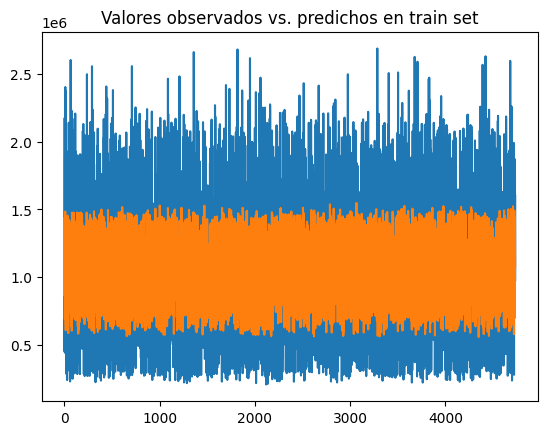

In [118]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

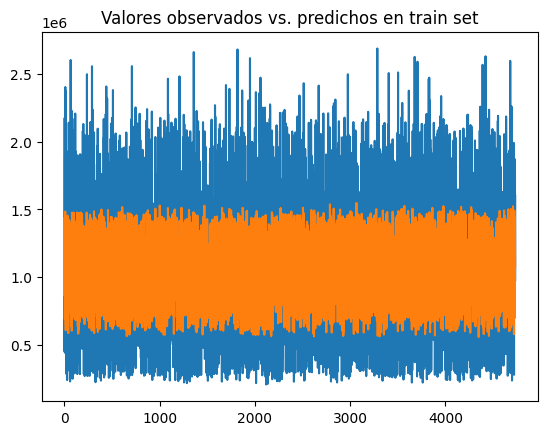

In [119]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

In [120]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test.round(2))

El R^2 del subconjunto de entrenamiento es: 0.2
El R^2 del subconjunto de prueba es: 0.18


# 11. Grafique a los valores predicho de modelo vs los valores reales. ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.

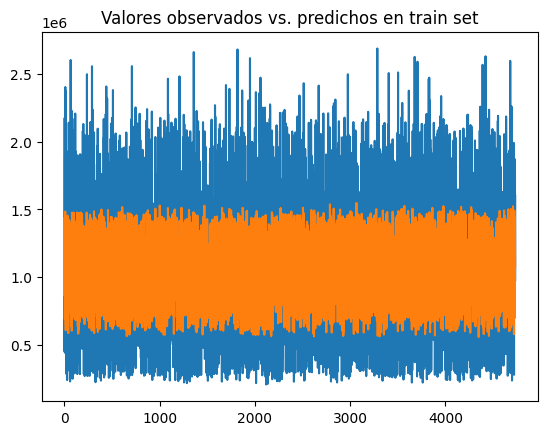

In [121]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

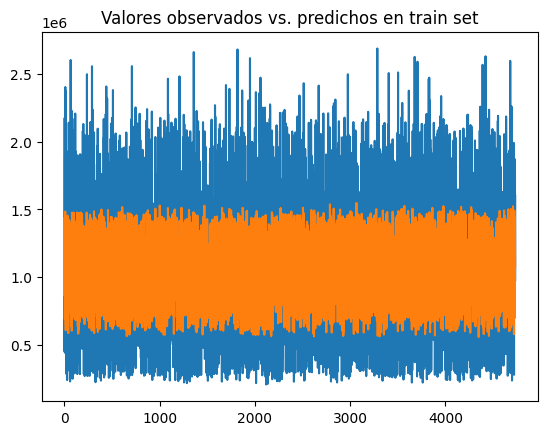

In [122]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

Las graficas tienen una predicción baja, esto se debe al volumen de datos y la temporalidad.

# 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo

In [123]:
# prompt: ver las variables de x

print(X.columns)


Index(['año', 'fecha', 'feriado', 'ind_precio_consumidor', 'mes', 'nro_tienda',
       'precio_combustible', 'tasa_desempleo', 'temperatura'],
      dtype='object')


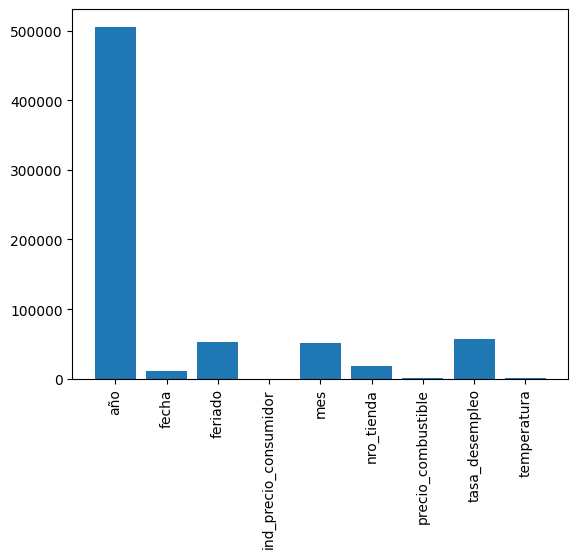

In [124]:
# Assuming 'model' is your fitted LinearRegression model
importancia = model.coef_  # Get the coefficients instead of feature importances

plt.bar([x for x in range(len(importancia))], abs(importancia))
plt.xticks(range(len(X.columns)), X.columns, rotation=90) # Add labels for each feature
plt.show()

Los coeficientes indican la relación lineal entre cada característica y la variable de respuesta, por lo que los coeficientes con valores absolutos más altos pueden considerarse como características más importantes en términos de su contribución relativa al modelo.
'feriado', 'nro_tienda','precio_combustible', 'tasa_desempleo', 'temperatura

# 13. Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma.

git remote add origin https://github.com/Kellyespana/S4_CASO_PRACTICO_BDD_FINAL.git
git branch -M main
git push -u origin main